In [279]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn

In [280]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [281]:
import warnings
warnings.filterwarnings('ignore')

In [282]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [283]:
train_dataset.head()

,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539


In [284]:
# test_train_train_train_train_train_train_train_train_train_train_train_train_train_train_train_train_train_datasetsetsetsetsetsetsetsetsetsetsetsetsetsetsetsetsetset.head()

In [285]:
train_dataset.shape

(240, 5)

Let's remove duplicates in the train dataset to prevent biases

In [286]:
train_dataset.drop_duplicates(inplace=True)

In [287]:
train_dataset.shape

(240, 5)

In [288]:
test_dataset.shape

(60, 5)

To understand more about the dataset, we take a look into train_dataset.describe()

In [289]:
train_dataset.describe()

,Feature1,Feature3,Feature4,Label
count,231.000000,240.000000,227.000000,240.000000
mean,30.277218,69.706130,59.584543,308.476235
std,11.176810,187.923364,45.546105,464.394364
min,10.432014,-1129.060001,0.000000,-32.466802
25%,20.973077,23.892696,15.156651,28.887374
50%,29.870713,54.468361,53.978447,140.441039
75%,39.987688,91.713817,105.722662,373.604837
max,49.487028,1260.447274,127.999842,3253.238626


Feature 3 has a very high range (-1129,1260) and also a whopping standard deviation of 187.92. We can also confirm this using the boxplot of feature 3. The same can be said about the labels(standard deviation: 464.39)

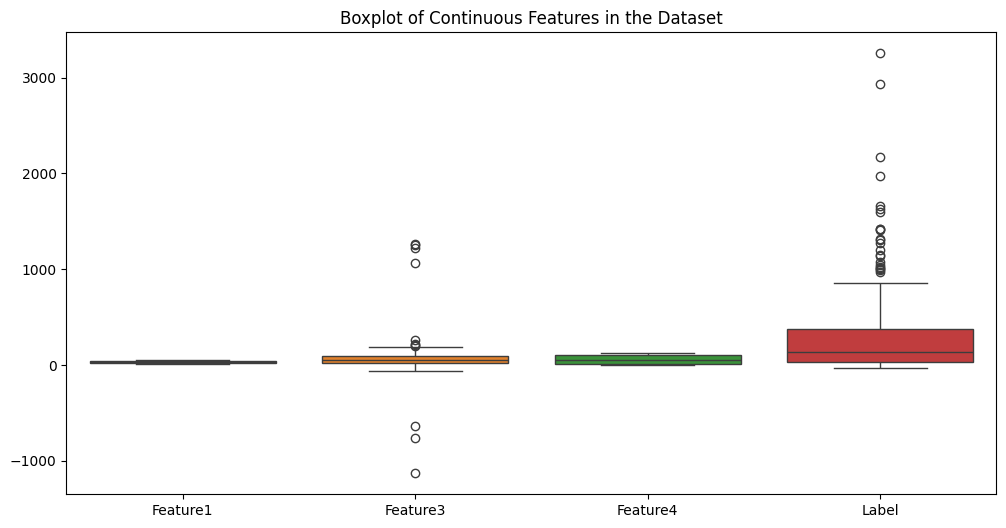

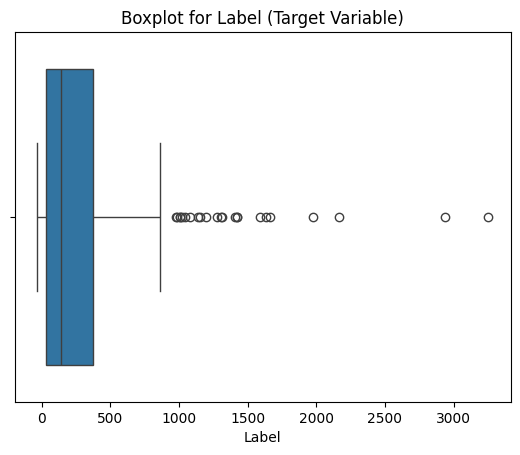

In [290]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_dataset[['Feature1', 'Feature3', 'Feature4', 'Label']])
plt.title('Boxplot of Continuous Features in the Dataset')
plt.show()
sns.boxplot(x=train_dataset['Label'])
plt.title('Boxplot for Label (Target Variable)')
plt.show()


Let's start by removing null values

In [291]:
null_value_percentages=(train_dataset.isna().sum()/train_dataset.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

Feature1    3.750000
Feature4    5.416667
dtype: float64

Looking at the percentages of null values, we can divide the column types largely into these categories:

Columns with very less null values (0-5%)
Columns with moderate amount of null values (5-30%)
Columns with a lot of null values (>30%)

Therefore, Feature 1 comes in category 1, and Feature 4 in category 2

For a category 1 feature(Feature 1), we'll drop drop rows

In [292]:
rows_to_drop=null_value_percentages[null_value_percentages<10].sort_values(ascending=False)
rows_to_drop=rows_to_drop.keys()
rows_to_drop

Index(['Feature4', 'Feature1', 'Feature2', 'Feature3', 'Label'], dtype='object')

In [293]:
for row in rows_to_drop:
	print("row: ",row,"\tmissing values: \t",train_dataset[row].isna().sum())

row:  Feature4 	missing values: 	 13
row:  Feature1 	missing values: 	 9
row:  Feature2 	missing values: 	 0
row:  Feature3 	missing values: 	 0
row:  Label 	missing values: 	 0


In [294]:
train_dataset.shape

(240, 5)

In [295]:
for row in rows_to_drop:
	if(null_value_percentages[row]<10):
		train_dataset.drop(labels=train_dataset.index[train_dataset[row].isna()],inplace=True)

In [296]:
train_dataset.shape

(218, 5)

We can see that 22 rows were dropped, due to null values in features 1 and 4

In [297]:
null_value_percentages=(train_dataset.isna().sum()/train_dataset.shape[0])*100
null_value_percentages=null_value_percentages[null_value_percentages>0]
columns_to_impute=null_value_percentages.keys()
columns_to_impute

Index([], dtype='object')

In [298]:
# for column in columns_to_impute:
# 	if(train_dataset[column].dtype== object):
# 		print("Column: ",column,"\tCounts:\n", train_dataset[column].value_counts(dropna=False))
# 		print("\n\n")
# columns_to_impute

In [299]:
# train_dataset['Feature4'].replace(to_replace=np.nan,value='NoFeature4',inplace=True)

In [300]:
# for column in columns_to_impute:
# 	if(train_dataset[column].dtype== object):
# 		print("Column: ",column,"\tCounts:\n", train_dataset[column].value_counts(dropna=False))
# 		print("\n\n")

In [301]:
train_dataset.shape

(218, 5)

In [302]:
null_value_percentages=(train_dataset.isna().sum()/train_dataset.shape[0])*100
columns_with_null_values = null_value_percentages[null_value_percentages>0]
columns_with_null_values

Series([], dtype: float64)

We've now sucessfully removed rows with null values. Now, we'll remove outliers

In [303]:
Q1 = train_dataset['Label'].quantile(0.25)
Q3 = train_dataset['Label'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outliers below {lower_bound} and above {upper_bound}")

# Detect outliers
outliers = train_dataset[(train_dataset['Label'] < lower_bound) | (train_dataset['Label'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)


Outliers below -489.14044066006767 and above 891.7153976022158
Number of outliers: 22
      Feature1  Feature2     Feature3    Feature4        Label
5    38.202274      True   190.708789   91.022063  1659.887652
9    42.297529     False   153.559543    0.498544  1044.906784
33   49.407291     False   157.624254  111.917301  1075.920453
49   41.581636     False   256.706258    0.610374  2936.716837
53   37.677354     False   157.191571  104.744837  1135.797745
69   46.173604     False   167.675093    0.205766  1410.638207
75   39.928831      True   157.864154   15.988630  1007.929686
91   45.995190     False   147.034670   22.927360  1004.196812
100  47.211555      True   166.234341   71.046466  1199.014805
102  38.481219     False   187.673921   19.533768  1630.640643
116  40.494263      True   195.916589  124.592436  1592.805299
121  45.740896     False   141.049056    0.000000  1020.434168
127  47.216328     False   220.835615   36.592145  2168.662088
155  31.051270      True   152.5

Let's remove the outliers for now(we can also use a log transformation)

In [304]:
train_dataset['Label_capped'] = np.where(train_dataset['Label'] > upper_bound, upper_bound, 
                                    np.where(train_dataset['Label'] < lower_bound, lower_bound, train_dataset['Label']))

In [305]:
outliers = train_dataset[(train_dataset['Label_capped'] < lower_bound) | (train_dataset['Label_capped'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(outliers)

Number of outliers: 0
Empty DataFrame
Columns: [Feature1, Feature2, Feature3, Feature4, Label, Label_capped]
Index: []


In [306]:
train_dataset.head()

,Feature1,Feature2,Feature3,Feature4,Label,Label_capped
0,26.303954,True,59.919036,126.853479,170.361411,170.361411
1,19.646076,False,34.504636,108.363933,29.897337,29.897337
2,36.983463,False,98.503396,5.085491,373.460027,373.460027
3,36.516512,False,38.418101,1.173449,26.696336,26.696336
4,28.734387,False,99.286184,29.123061,332.682539,332.682539


In [307]:
train_dataset.describe()

,Feature1,Feature3,Feature4,Label,Label_capped
count,218.000000,218.000000,218.000000,218.000000,218.000000
mean,30.266184,77.151164,59.677684,312.933527,253.608946
std,11.288466,178.419988,46.196870,474.819509,284.860918
min,10.432014,-765.458449,0.000000,-32.466802,-32.466802
25%,20.967679,24.518130,14.190661,28.680499,28.680499
50%,28.692677,56.419921,53.137483,141.023046,141.023046
75%,40.171933,92.265208,108.107150,373.894458,373.894458
max,49.487028,1260.447274,127.999842,3253.238626,891.715398


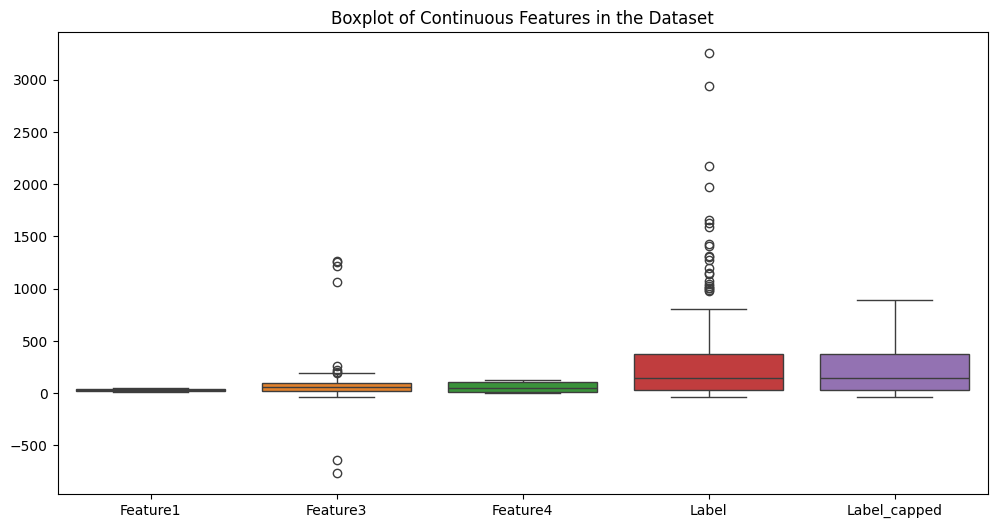

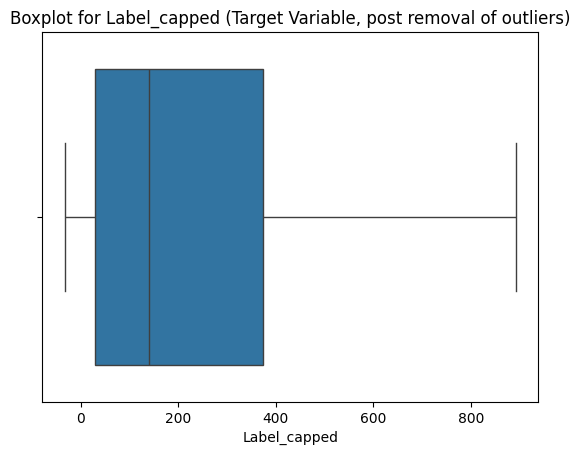

In [308]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_dataset[['Feature1', 'Feature3', 'Feature4', 'Label', 'Label_capped']])
plt.title('Boxplot of Continuous Features in the Dataset')
plt.show()
sns.boxplot(x=train_dataset['Label_capped'])
plt.title('Boxplot for Label_capped (Target Variable, post removal of outliers)')
plt.show()


Let's remove null values and Outliers in a more efficient way, using scipy and other libraries

In [309]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score
from scipy import stats

In [310]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [311]:
train = train.dropna()
test = test.dropna()

Now, feature 2 is a boolean feature, we convert the boolean values to integers

In [312]:
train['Feature2'] = train['Feature2'].astype(int)
test['Feature2'] = test['Feature2'].astype(int)

In [313]:
X = train[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
y = train['Label']

Now, we define a function to remove outliers by using zscore() in scipy

In [314]:
def remove_outliers_z(df, numeric_features, threshold=3):
    df_clean = df.copy()
    for feature in numeric_features:
        z_scores = np.abs(stats.zscore(df_clean[feature]))
        df_clean = df_clean[z_scores < threshold]
    return df_clean

Now, let's remove outliers

In [315]:
numeric_features = ['Feature1', 'Feature3', 'Feature4']
train_clean = remove_outliers_z(train, numeric_features)

We've sucessfully removed outliers, now we can start training our model

In [316]:
# Define features and label after outlier removal
X_clean = train_clean[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
y_clean = train_clean['Label']

In [317]:
# Split the cleaned data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_clean, y_clean, test_size=0.2, random_state=23)
#Here, I'm using a random state of 23

Let's do some feature scaling

In [318]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Now, let's define our polynomial degrees, alphas, and l1_ratios for regularization models

In [319]:
degrees = [1, 2, 3, 4]  # Including polynomial degrees for complexity
alphas = np.logspace(-3, 3, 7)  # Improved range of alpha values
l1_ratios = [0.1, 0.5, 0.9]  # Range of l1_ratios for ElasticNet

We do a k-fold Cross validation to better train our model

In [320]:
kf = KFold(n_splits=20, shuffle=True, random_state=23)

Now, let's perform GridSearch over the polynomial degrees, alpha, and l1_ratio for Ridge, Lasso, and ElasticNet

In [321]:
best_model = None
best_poly = None
best_cv_score = -np.inf
best_params = {}
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    models = {
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet()
    }
    
    # Let us define parameter grids for models
    param_grids = {
        'Ridge': {'alpha': alphas},
        'Lasso': {'alpha': alphas},
        'ElasticNet': {'alpha': alphas, 'l1_ratio': l1_ratios}
    }
    
    # Do a GridSearchCV for each model
    for model_name, model in models.items():
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')
        grid_search.fit(X_train_poly, y_train)
        
        # find the best score and model for this polynomial degree
        mean_cv_score = grid_search.best_score_
        if mean_cv_score > best_cv_score:
            best_cv_score = mean_cv_score
            best_model = grid_search.best_estimator_
            best_poly = poly
            best_params = grid_search.best_params_
            best_model_name = model_name

print(f'Best Model: {best_model_name} with polynomial degree {best_poly.degree} and parameters: {best_params}')
print(f'Best CV R² Score: {best_cv_score:.4f}')

Best Model: Lasso with polynomial degree 2 and parameters: {'alpha': np.float64(1.0)}
Best CV R² Score: 0.9364


Now we found the best model using k-fold cross validation. Now, we train that model using the whole training set

In [322]:
X_train_best_poly = best_poly.transform(X_train_scaled)
X_val_best_poly = best_poly.transform(X_val_scaled)
best_model.fit(X_train_best_poly, y_train)

Lasso(alpha=np.float64(1.0))

Now, let's predict on the validation and test sets

In [323]:
y_val_pred = best_model.predict(X_val_best_poly)
r2_val = r2_score(y_val, y_val_pred)
print(f'R² Score on Validation Set: {r2_val:.4f}')

X_test_features = test[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
X_test_scaled = scaler.transform(X_test_features)
X_test_best_poly = best_poly.transform(X_test_scaled)
test_predictions = best_model.predict(X_test_best_poly)

R² Score on Validation Set: 0.9874


Let us now generate the submission file

In [324]:
submission = pd.DataFrame({
    'id': test.index,
    'Label': test_predictions
})
submission.to_csv('submission.csv', index=False)

print("Submission file saved successfully.")

Submission file saved successfully.
